# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/rez_sample_04I/'
#path = '/src/data/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Branch,Option,Build Time,bt_user,bt_sys,Binary Size
0,ixterm-00001-00006,"['--disable-ansi-color', '--disable-16-color',...",9.906,9.103,0.774,3015768
1,ixterm-00001-00015,"['--disable-active-icon', '--disable-16-color'...",10.344,9.666,0.641,3057856
2,ixterm-00001-00012,"['--disable-active-icon', '--disable-ansi-colo...",8.975,8.373,0.576,2883584
3,ixterm-00001-00014,"['--disable-ansi-color', '--disable-256-color'...",8.694,8.134,0.536,2743048
4,ixterm-00001-00005,"['--disable-16-color', '--disable-256-color', ...",11.647,10.898,0.717,3456200
...,...,...,...,...,...,...
375,ixterm-00020-00016,"['--disable-ansi-color', '--disable-direct-col...",9.656,9.057,0.572,2862200
376,ixterm-00020-00013,"['--disable-active-icon', '--disable-16-color'...",10.001,9.214,0.760,3015848
377,ixterm-00020-00018,"['--disable-active-icon', '--disable-16-color'...",8.517,7.915,0.578,2739752
378,ixterm-00020-00003,"['--disable-ansi-color', '--disable-direct-col...",11.485,10.607,0.848,3202648


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")
df = df_setindex[['Br1', 'Branch', 'Build Time', 'Binary Size']]

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Br1,Branch,Build Time,Binary Size
Br2,,,,
00001,00012,ixterm-00012-00001,9.276,2736120
00001,00004,ixterm-00004-00001,8.406,2736120
00001,00002,ixterm-00002-00001,8.417,2736120
00001,00005,ixterm-00005-00001,9.272,2736120
00001,00006,ixterm-00006-00001,9.287,2736120
...,...,...,...,...
00020,00005,ixterm-00005-00020,12.076,3034008
00020,00003,ixterm-00003-00020,10.722,3034008
00020,00019,ixterm-00019-00020,10.790,3034008


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt2.unstack()

Build Time                                                          \
Br1        00001   00002   00003   00004   00005   00006   00007   00008   
Br2                                                                        
00001        NaN   8.417   8.408   8.406   9.272   9.287   8.454   8.439   
00002      8.002     NaN   8.066   8.044   8.812   9.252   8.156   8.128   
00003     11.410  11.464     NaN  11.418  12.646  12.702  11.529  11.466   
00004     11.119  11.065  11.186     NaN  11.973  12.349  11.232  11.144   
00005     11.647  11.673  11.650  11.678     NaN  12.809  11.769  11.858   
00006      9.906   9.778   9.791   9.922   9.773     NaN  10.679   9.939   
00007      9.551   9.510   9.547   9.551  10.081  10.539     NaN   9.542   
00008      9.742   9.812  10.155   9.773  10.766  10.755   9.816     NaN   
00009     11.376  11.407  11.420  11.422  12.492  12.385  11.379  11.665   
00010     10.579  10.557  10.621  10.602  11.880  11.683  10.764  10.613   
00011      9.640   9.736   9.739   9.642  10.722  10.675   9.638   9.633   
00012      8.975   8.911   8.941   9.019   9.259   9.853   9.764   8.947   
00013      9.986  10.043  10.025  10.012  10.940  11.007  10.006  10.116   
00014      8.694   8.709   8.769   8.748   9.125   9.704   8.945   8.758   
00015     10.344  10.057  10.136  10.120  10.079  11.161  11.199  10.101   
00016      9.608   9.658   9.651   9.665  10.694  10.701   9.749   9.733   
00017      7.472   7.644   7.549   7.493   8.066   8.287   7.523   7.505   
00018      8.467   8.516   8.522   8.491   9.276   9.398   8.499   8.497   
00019     11.624  11.701  11.659  11.913  12.670  12.945  11.763  11.728   
00020     10.694  10.682  10.722  10.781  12.076  11.837  10.729  10.753   

                                                                               \
Br1     00009   00010   00011   00012   00013   00014   00015   00016   00017   
Br2                                                                             
00001   8.509   8.450   9.167   9.276   9.240   8.494   8.511   8.468   8.424   
00002   8.130   8.152   8.836   8.726   8.767   8.085   8.124   8.157   8.090   
00003  11.511  11.423  12.472  12.509  12.491  11.522  11.587  11.543  11.477   
00004  11.147  11.258  12.087  12.232  12.318  11.254  11.156  11.216  11.223   
00005  11.671  11.764  12.558  12.836  12.726  13.187  11.734  11.741  11.713   
00006   9.917   9.868  10.157  10.698  10.735  10.903   9.922   9.954   9.925   
00007   9.618   9.582  10.402  10.510  10.589   9.640   9.627   9.587   9.692   
00008   9.867   9.795  10.665  10.777  10.641   9.879  10.167   9.772   9.818   
00009     NaN  11.468  12.426  12.446  12.495  11.517  11.452  11.481  11.795   
00010  10.591     NaN  11.535  11.574  11.638  10.797  10.685  10.682  10.612   
00011   9.708   9.799     NaN  10.499  10.572   9.712   9.740   9.685   9.655   
00012   8.976   8.976   9.612     NaN   9.962  10.060   8.970   9.075   9.014   
00013  10.027  10.032  10.878  10.928     NaN  10.072  10.174  10.127  10.040   
00014   8.740   8.804   9.416   9.524   9.561     NaN   8.738   8.807   8.802   
00015  10.141  10.188  10.923  11.188  11.190  11.368     NaN  10.228  10.231   
00016   9.654   9.692  10.588  10.514  10.813   9.718   9.733     NaN   9.652   
00017   7.552   7.558   8.110   8.201   8.218   7.568   7.515   7.583     NaN   
00018   8.536   8.483   9.250   9.288   9.323   8.532   8.574   8.555   8.509   
00019  11.726  11.714  12.787  12.748  12.716  11.787  11.826  11.691  11.660   
00020  10.712  10.828  11.657  11.781  11.799  11.054  10.730  10.780  10.809   

                               
Br1     00018   00019   00020  
Br2                            
00001   8.404   8.449   8.404  
00002   8.122   8.102   8.089  
00003  11.472  11.534  11.485  
00004  11.133  11.148  11.206  
00005  11.678  11.652  11.673  
00006   9.832   9.794   9.813  
00007   9.551   9.592   9.631  
00008   9.746   9.768   9.757  
00009  11.411  11.411  11.408  
00010  10

In [5]:
# A detailed view of each executable's binary size after incremebtal build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN  2736120.0  2736120.0  2736120.0  2736120.0  2736120.0   
00002   2468160.0        NaN  2468160.0  2468160.0  2468160.0  2468160.0   
00003   3202648.0  3202648.0        NaN  3202648.0  3202648.0  3202648.0   
00004   3344192.0  3344192.0  3344192.0        NaN  3344192.0  3344192.0   
00005   3456200.0  3456200.0  3456200.0  3456200.0        NaN  3456200.0   
00006   3015768.0  3015768.0  3015768.0  3015768.0  3015768.0        NaN   
00007   2857160.0  2857160.0  2857160.0  2857160.0  2857160.0  2857160.0   
00008   2902288.0  2902288.0  2902288.0  2902288.0  2902288.0  2902288.0   
00009   3218472.0  3218472.0  3218472.0  3218472.0  3218472.0  3218472.0   
00010   3023648.0  3023648.0  3023648.0  3023648.0  3023648.0  3023648.0   
00011   2904408.0  2904408.0  2904408.0  2904408.0  2904408.0  2904408.0   
00012   2883584.0  2883584.0  2883584.0  2883584.0  2883584.0  2883584.0   
00013   3015848.0  3015848.0  3015848.0  3015848.0  3015848.0  3015848.0   
00014   2743048.0  2743048.0  2743048.0  2743048.0  2743048.0  2743048.0   
00015   3057856.0  3057856.0  3057856.0  3057856.0  3057856.0  3057856.0   
00016   2862200.0  2862200.0  2862200.0  2862200.0  2862200.0  2862200.0   
00017   2393760.0  2393760.0  2393760.0  2393760.0  2393760.0  2393760.0   
00018   2739752.0  2739752.0  2739752.0  2739752.0  2739752.0  2739752.0   
00019   3295512.0  3295512.0  3295512.0  3295512.0  3295512.0  3295512.0   
00020   3034008.0  3034008.0  3034008.0  3034008.0  3034008.0  3034008.0   

                                                                         \
Br1        00007      00008      00009      00010      00011      00012   
Br2                                                                       
00001  2736120.0  2736120.0  2736120.0  2736120.0  2736120.0  2736120.0   
00002  2468160.0  2468160.0  2468160.0  2468160.0  2468160.0  2468160.0   
00003  3202648.0  3202648.0  3202648.0  3202648.0  3202648.0  3202648.0   
00004  3344192.0  3344192.0  3344192.0  3344192.0  3344192.0  3344192.0   
00005  3456200.0  3456200.0  3456200.0  3456200.0  3456200.0  3456200.0   
00006  3015768.0  3015768.0  3015768.0  3015768.0  3015768.0  3015768.0   
00007        NaN  2857160.0  2857160.0  2857160.0  2857160.0  2857160.0   
00008  2902288.0        NaN  2902288.0  2902288.0  2902288.0  2902288.0   
00009  3218472.0  3218472.0        NaN  3218472.0  3218472.0  3218472.0   
00010  3023648.0  3023648.0  3023648.0        NaN  3023648.0  3023648.0   
00011  2904408.0  2904408.0  2904408.0  2904408.0        NaN  2904408.0   
00012  2883584.0  2883584.0  2883584.0  2883584.0  2883584.0        NaN   
00013  3015848.0  3015848.0  3015848.0  3015848.0  3015848.0  3015848.0   
00014  2743048.0  2743048.0  2743048.0  2743048.0  2743048.0  2743048.0   
00015  3057856.0  3057856.0  3057856.0  3057856.0  3057856.0  3057856.0   
00016  2862200.0  2862200.0  2862200.0  2862200.0  2862200.0  2862200.0   
00017  2393760.0  2393760.0  2393760.0  2393760.0  2393760.0  2393760.0   
00018  2739752.0  2739752.0  2739752.0  2739752.0  2739752.0  2739752.0   
00019  3295512.0  3295512.0  3295512.0  3295512.0  3295512.0  3295512.0   
00020  3034008.0  3034008.0  3034008.0  3034008.0  3034008.0  3034008.0   

                                                                         \
Br1        00013      00014      00015      00016      00017      00018   
Br2                                                                       
00001  2736120.0  2736120.0  2736120.0  2736120.0  2736120.0  2736120.0   
00002  2468160.0  2468160.0  2468160.0  2468160.0  2468160.0  2468160.0   
00003  3202648.0  3202648.0  3202648.0  3202648.0  3202648.0  3202648.0   
00004  3344192.0  3344192.0  3344192.0  3344192.0  3344192.0  3344192.0   
00005 

In [6]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = "Br2", 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=["max", "mean", "min"],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,9.287,8.656789,8.404
00002,9.252,8.307368,8.002
00003,12.702,11.771632,11.410
00004,12.349,11.444526,11.065
00005,13.187,12.000895,11.647
00006,10.903,10.068737,9.773
00007,10.589,9.807474,9.510
00008,10.777,10.077421,9.742


In [7]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00005,13.187,12.000895,11.647
00019,12.945,12.001579,11.624
00003,12.702,11.771632,11.410
00009,12.495,11.729263,11.376
00004,12.349,11.444526,11.065
00020,12.076,11.051053,10.682
00010,11.880,10.906368,10.557
00015,11.368,10.477895,10.057


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

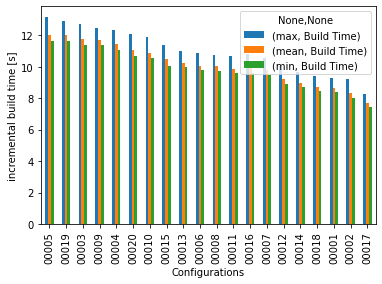

In [8]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

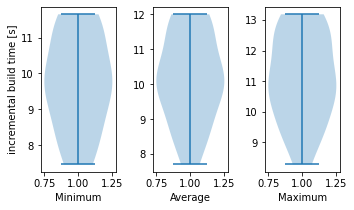

In [9]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()